Create Latitude and Longitude Combinations

In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# 6.1.4 Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
coordinates

[(-11.477516875300466, -62.00844675870374),
 (11.477560529042492, 30.787955607199677),
 (6.357378277486916, 68.91625931801406),
 (62.10819900466663, -131.33498734430924),
 (-15.255797752972, -18.06641686780148),
 (59.21880746434729, -35.8644980667961),
 (-13.327469910865318, -122.32725271117437),
 (-84.69121384282164, 88.59858698944049),
 (-6.390511870515894, -141.22195519097747),
 (47.13016921791362, 105.82386232648298),
 (-21.345332588335282, -148.82597549296372),
 (-12.64193579832991, 36.86727548258369),
 (-57.0383234196343, -109.37850942553733),
 (68.3637458616954, -116.54679959832995),
 (25.740121404755186, 86.27582555910425),
 (8.294381056501905, -40.25749292335624),
 (62.93809225769314, -18.229953968587722),
 (-81.4486812193405, 108.93390774964621),
 (70.37223366707477, 65.96328772705044),
 (-35.15416612328701, 153.77612343859602),
 (-73.56169352595575, 86.95549558817379),
 (25.05736057705988, 114.47877931848205),
 (-59.97053709446701, -115.8393046537755),
 (-31.41317684982502, 

Match those coordinates up with cities:Generate Random World Cities

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

646

In [7]:
type(cities)

list

### 6.2.6 Get the City Weather Data

We will need to do the following:

1. Import our dependencies and initialize counters and an empty list that will hold the weather data.
2. Loop through the cities list.
3. Group the cities in sets of 50 to log the process as we find the weather data for each city.
- Two counters will be needed here: one to log the city count from 1 to 50, and another for the sets.
4. Build the city_url or endpoint for each city.
5. Log the URL and the record and set numbers.
6. Make an API request for each city.
7. Parse the JSON weather data for the following:
- City, country, and date
- Latitude and longitude
- Maximum temperature
- Humidity
- Cloudiness
- Wind speed

#### 1. Import our dependencies and initialize counters and an empty list that will hold the weather data

In [8]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [9]:
# Build the basic URL for the OpenWeatherMap with your weather_api_key added to the URL.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print (url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8c54be926658142268a21328046f6c13


In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

### Loop Through the List of Cities and Build the City URL
# Loop through all the cities in the list.

for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | presidente medici
Processing Record 2 of Set 1 | abu jubayhah
City not found. Skipping...
Processing Record 3 of Set 1 | ugoofaaru
Processing Record 4 of Set 1 | whitehorse
Processing Record 5 of Set 1 | georgetown
Processing Record 6 of Set 1 | tasiilaq
Processing Record 7 of Set 1 | rikitea
Processing Record 8 of Set 1 | busselton
Processing Record 9 of Set 1 | atuona
Processing Record 10 of Set 1 | ulaanbaatar
Processing Record 11 of Set 1 | mataura
Processing Record 12 of Set 1 | tunduru
City not found. Skipping...
Processing Record 13 of Set 1 | castro
Processing Record 14 of Set 1 | yellowknife
Processing Record 15 of Set 1 | rusera
Processing Record 16 of Set 1 | carutapera
Processing Record 17 of Set 1 | vestmannaeyjar
Processing Record 18 of Set 1 | albany
Processing Record 19 of Set 1 | sovetskiy
Processing Record 20 of Set 1 | sydney
Processing Record 21 of Set 1 | xiongzhou
Processing

Processing Record 37 of Set 4 | korem
Processing Record 38 of Set 4 | sao jose da coroa grande
Processing Record 39 of Set 4 | prince rupert
Processing Record 40 of Set 4 | kitoy
Processing Record 41 of Set 4 | saint-philippe
Processing Record 42 of Set 4 | matagalpa
Processing Record 43 of Set 4 | baker city
Processing Record 44 of Set 4 | sanandaj
Processing Record 45 of Set 4 | pevek
Processing Record 46 of Set 4 | hermanus
Processing Record 47 of Set 4 | armacao dos buzios
City not found. Skipping...
Processing Record 48 of Set 4 | golden
Processing Record 49 of Set 4 | cherskiy
Processing Record 50 of Set 4 | san policarpo
Processing Record 1 of Set 5 | conceicao do araguaia
Processing Record 2 of Set 5 | lagoa
Processing Record 3 of Set 5 | ocean city
Processing Record 4 of Set 5 | rawson
Processing Record 5 of Set 5 | talnakh
Processing Record 6 of Set 5 | garissa
Processing Record 7 of Set 5 | tayu
Processing Record 8 of Set 5 | taolanaro
City not found. Skipping...
Processing 

Processing Record 23 of Set 8 | sanandrei
Processing Record 24 of Set 8 | xuddur
Processing Record 25 of Set 8 | qui nhon
Processing Record 26 of Set 8 | baharampur
Processing Record 27 of Set 8 | mumford
Processing Record 28 of Set 8 | magadan
Processing Record 29 of Set 8 | tabiauea
City not found. Skipping...
Processing Record 30 of Set 8 | bellview
Processing Record 31 of Set 8 | esna
Processing Record 32 of Set 8 | tamandare
Processing Record 33 of Set 8 | luderitz
Processing Record 34 of Set 8 | raudeberg
Processing Record 35 of Set 8 | hede
Processing Record 36 of Set 8 | warragul
Processing Record 37 of Set 8 | pakokku
Processing Record 38 of Set 8 | tete
Processing Record 39 of Set 8 | dondo
Processing Record 40 of Set 8 | quatre cocos
Processing Record 41 of Set 8 | takoradi
Processing Record 42 of Set 8 | bowen
Processing Record 43 of Set 8 | jumla
Processing Record 44 of Set 8 | samusu
City not found. Skipping...
Processing Record 45 of Set 8 | koumac
Processing Record 46 o

Processing Record 13 of Set 12 | walvis bay
Processing Record 14 of Set 12 | nikki
Processing Record 15 of Set 12 | arawa
Processing Record 16 of Set 12 | laranjeiras do sul
Processing Record 17 of Set 12 | roma
Processing Record 18 of Set 12 | havre-saint-pierre
Processing Record 19 of Set 12 | peniche
Processing Record 20 of Set 12 | saleaula
City not found. Skipping...
Processing Record 21 of Set 12 | vanderhoof
Processing Record 22 of Set 12 | kotma
Processing Record 23 of Set 12 | orito
Processing Record 24 of Set 12 | kieta
Processing Record 25 of Set 12 | puerto escondido
Processing Record 26 of Set 12 | petrovsk
Processing Record 27 of Set 12 | yumen
Processing Record 28 of Set 12 | bosaso
Processing Record 29 of Set 12 | atka
City not found. Skipping...
Processing Record 30 of Set 12 | cockburn town
Processing Record 31 of Set 12 | kaduy
Processing Record 32 of Set 12 | kadirli
Processing Record 33 of Set 12 | banda aceh
Processing Record 34 of Set 12 | kansanshi
Processing Re

In [11]:
len(city_data)
    

591

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Presidente Medici,-11.1753,-61.9014,68.92,92,12,2.68,BR,2022-05-06 05:16:19
1,Ugoofaaru,5.6667,73.0000,85.10,73,100,16.91,MV,2022-05-06 05:16:20
2,Whitehorse,60.7161,-135.0538,41.77,45,75,3.44,CA,2022-05-06 05:15:15
3,Georgetown,5.4112,100.3354,89.53,66,20,6.91,MY,2022-05-06 05:11:22
4,Tasiilaq,65.6145,-37.6368,21.36,70,11,6.82,GL,2022-05-06 05:16:21
5,Rikitea,-23.1203,-134.9692,77.65,86,66,16.64,PF,2022-05-06 05:16:21
6,Busselton,-33.6500,115.3333,66.22,42,0,11.41,AU,2022-05-06 05:16:22
7,Atuona,-9.8000,-139.0333,79.09,76,72,15.37,PF,2022-05-06 05:16:22
8,Ulaanbaatar,47.9077,106.8832,51.93,19,20,4.47,MN,2022-05-06 05:12:38
9,Mataura,-46.1927,168.8643,62.47,84,100,1.95,NZ,2022-05-06 05:16:23


In [13]:
city_data_df_o=["City", "Country", "Date", "Lat", "Lng","Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [14]:
city_data_df=city_data_df[city_data_df_o]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Presidente Medici,BR,2022-05-06 05:16:19,-11.1753,-61.9014,68.92,92,12,2.68
1,Ugoofaaru,MV,2022-05-06 05:16:20,5.6667,73.0000,85.10,73,100,16.91
2,Whitehorse,CA,2022-05-06 05:15:15,60.7161,-135.0538,41.77,45,75,3.44
3,Georgetown,MY,2022-05-06 05:11:22,5.4112,100.3354,89.53,66,20,6.91
4,Tasiilaq,GL,2022-05-06 05:16:21,65.6145,-37.6368,21.36,70,11,6.82
...,...,...,...,...,...,...,...,...,...
586,Saint-Joseph,RE,2022-05-06 05:33:03,-21.3667,55.6167,79.18,78,39,16.08
587,Buraydah,SA,2022-05-06 05:33:03,26.3260,43.9750,82.85,18,0,10.29
588,Huntsville,US,2022-05-06 05:28:12,34.7304,-86.5861,69.67,95,100,8.05
589,Frankfort,ZA,2022-05-06 05:33:04,-27.2667,28.4833,53.35,49,0,1.10


In [17]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

### Get Data for Plotting

In [19]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

Create a scatter plot for the latitude vs. maximum temperature.

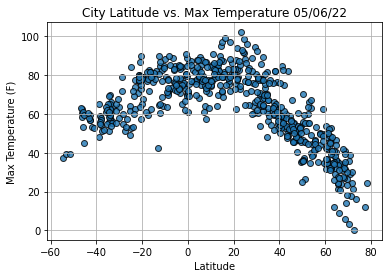

In [20]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

Scatter plot for the latitude versus humidity:

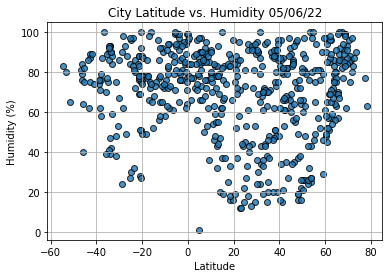

In [21]:
# Build the scatter plot for latitude vs. Humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

Plot Latitude vs. Cloudiness

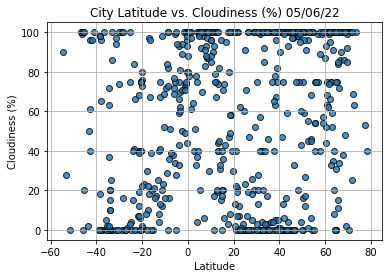

In [23]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

Plot Latitude vs. Wind Speed

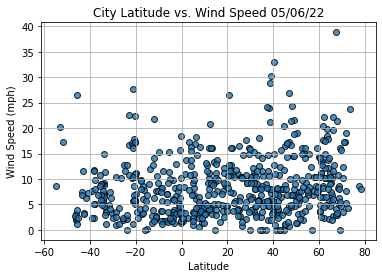

In [24]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()